In [57]:
import pandas as pd
import numpy as np
import os 
import kaggle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict, GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, confusion_matrix,precision_recall_curve, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from scipy.stats import randint
from tabulate import tabulate
from joblib import dump, load

In [58]:
X_train = pd.read_csv('../data/processed/X_train.csv')
y_train = pd.read_csv('../data/processed/y_train.csv')
X_test = pd.read_csv('../data/processed/X_test.csv')
y_test = pd.read_csv('../data/processed/y_test.csv')
y_train = np.array(y_train)
y_train = y_train.flatten()
y_test = np.array(y_test)
y_test = y_test.flatten()


In [59]:
X = pd.read_csv('../data/processed/X.csv')
y = pd.read_csv('../data/processed/y.csv')
y = np.array(y)
y = y.flatten()


In [60]:
model = load('../models/final_model_test.joblib')

In [61]:
y_pred = model.predict(X_test)

In [62]:
print(accuracy_score(y_test,y_pred))
print(f1_score(y_test,y_pred))

0.8695652173913043
0.8762886597938144


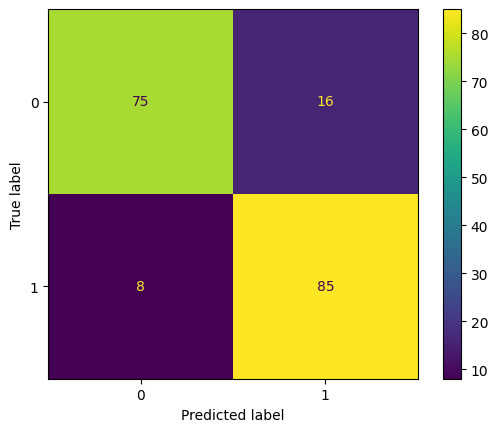

In [63]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
plt.show()

In [64]:
precisions, recalls, thresholds = precision_recall_curve(y_test,y_pred)

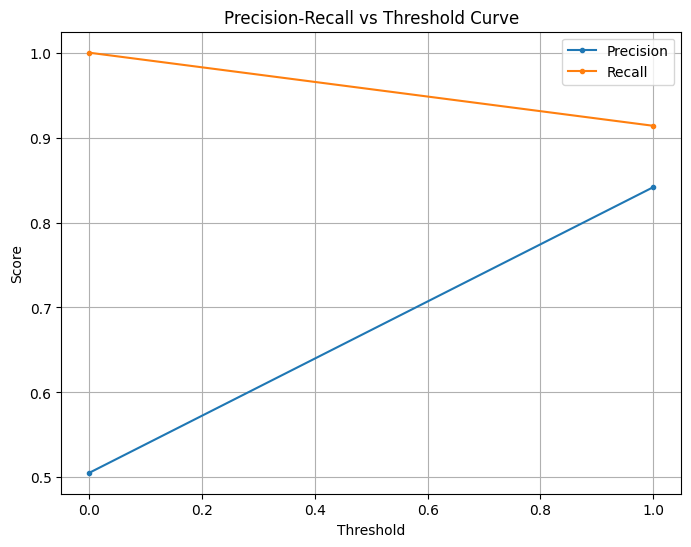

In [65]:
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precisions[:-1], label='Precision', marker='.')
plt.plot(thresholds, recalls[:-1], label='Recall', marker='.')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall vs Threshold Curve')
plt.legend()
plt.grid(True)
plt.show()

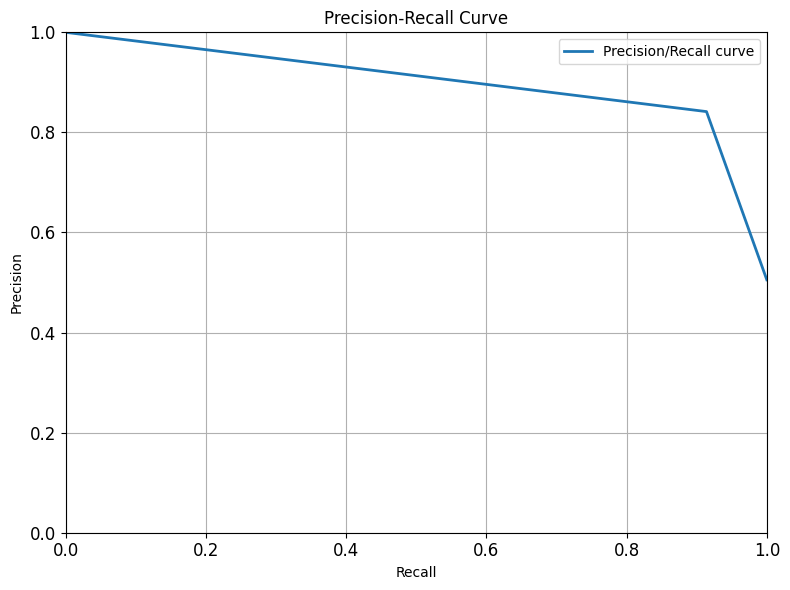

In [66]:
plt.figure(figsize=(8, 6))
plt.plot(recalls, precisions, linewidth=2, label='Precision/Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)

# Personalizar la apariencia de la gráfica
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.tight_layout()

# Mostrar la gráfica
plt.show()

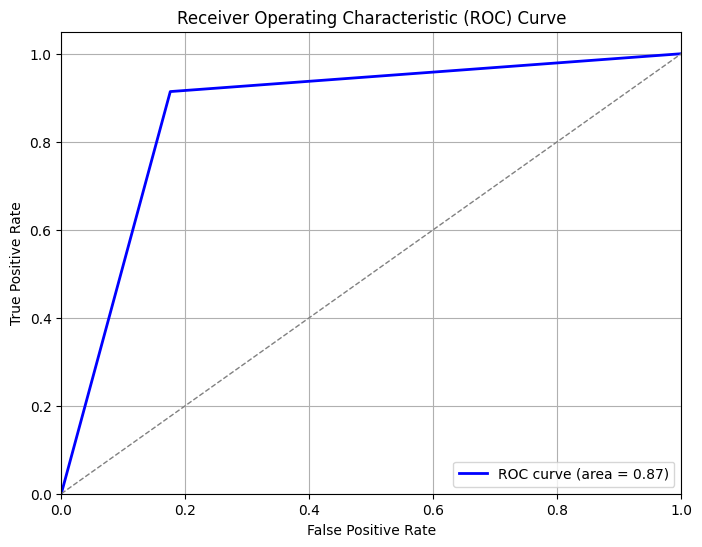

In [67]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Trazar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # Diagonal aleatoria
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [68]:
y_pred = cross_val_predict(model, X, y, cv=StratifiedKFold(5))
        
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.8420479302832244
Precision: 0.8379888268156425
Recall: 0.8858267716535433
F1-score: 0.861244019138756


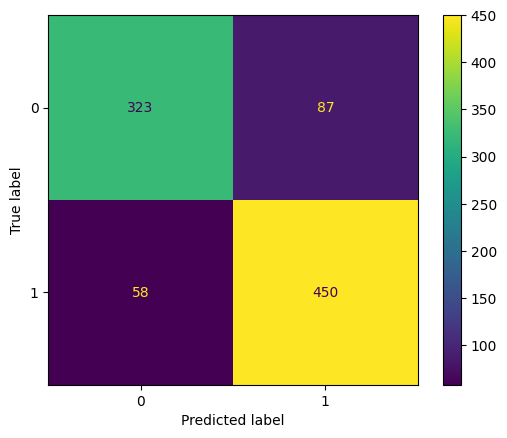

In [69]:
ConfusionMatrixDisplay.from_predictions(y,y_pred)
plt.show()

In [77]:
model.fit(X,y)

StackingClassifier(cv=5,
                   estimators=[('svc',
                                SVC(C=1, gamma='auto', probability=True,
                                    random_state=42)),
                               ('ada_rf',
                                SVC(C=1, gamma='auto', probability=True,
                                    random_state=42))],
                   final_estimator=SVC(C=1, gamma='auto', probability=True,
                                       random_state=42))

In [78]:
dump(model,'../models/finalmodel.joblib')

['../models/finalmodel.joblib']